In [4]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import random

In [5]:
N = 1024

def fun(t):
    return t + np.cos(30*t) + 6 * np.sin(50*t)


def sample(N):
    values = np.zeros(N)
    for i in range(N):
        values[i] = fun(i / N * 2 * np.pi)
    return values


def DiscreteFourierTransform(data):
    length = len(data)
    # M_nk = e^(−i 2πnk / N)
    vec = np.arange(0, length)[:, np.newaxis]
    base = vec * vec.T
    # base = np.array([[k * n for k in range(length)] for n in range(length)])
    transform = np.exp((-1j * 2 * np.pi / length) * base)
    result = transform @ data
    return result


def FastFourierTransform(data):
    length = len(data)
    if length == 1:
        return data
    if(length <=16):
      return DiscreteFourierTransform(data)
    else:
        X_even = FastFourierTransform(data[::2])
        X_odd = FastFourierTransform(data[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(length)/ length)
        
        X = np.concatenate(\
            [X_even+factor[:int(length/2)]*X_odd,
             X_even+factor[int(length/2):]*X_odd])
        return X


def InverseDiscreteFourierTransform(data):
    length = data.size
    M = np.zeros((length,length), dtype=complex)
    for i in range(length):
        for l in range(length):
            M[i][l] = np.e**(1j * (2*np.pi * i * l)/length)/length
    data = np.array(data)
    return M @ data


def InverseFastFourierTransform(data):
    length = len(data)
    if length == 1:
        return data
    if(length <=16):
      return InverseDiscreteFourierTransform(data)
    else:
        X_even = InverseFastFourierTransform(data[::2])
        X_odd = InverseFastFourierTransform(data[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(length)/ length)
        
        X = np.concatenate(\
            [X_even+factor[:int(length/2)]*X_odd,
             X_even+factor[int(length/2):]*X_odd])
        return X

In [6]:
values = sample(N)

start =timer()
transform = DiscreteFourierTransform(values)
end = timer()
print(end-start)

start =timer()
transform2 = np.fft.fft(values)
end = timer()
print(end-start)

start =timer()
transform3 = FastFourierTransform(values)
end = timer()
print(end-start)

res = np.allclose(transform,transform2)
print(res)

res2 = np.allclose(transform2,transform3)
print("FFT", res2)

0.12204020004719496
0.00043329992331564426
0.012343999929726124
True
FFT True


In [7]:
## ----------------------------------------------------------------------------------
## ZADANIE 5
## ----------------------------------------------------------------------------------

def InverseFastFourierTransform(data):
    length = len(data)
    if length == 1:
        return data
    if(length <=16):
      return InverseDiscreteFourierTransform(data)
    else:
        # WZÓR: IFFT = 1/N*conj(FFT(conj(x)))
        prepared_data = FastFourierTransform([np.conjugate(elem) for elem in data]),
        [Return] = np.conjugate([(elem/length).real for elem in prepared_data])
        return Return

print("DO IFFT:")
print("VALUES", values)
print("INVERSE", InverseFastFourierTransform(transform3))

res3 = np.allclose(InverseFastFourierTransform(transform3), values)
print("IFFT",res3)

DO IFFT:
VALUES [1.         2.80127711 4.40011379 ... 2.3411113  3.74905711 5.44811918]
INVERSE [1.         2.80127711 4.40011379 ... 2.3411113  3.74905711 5.44811918]
IFFT True


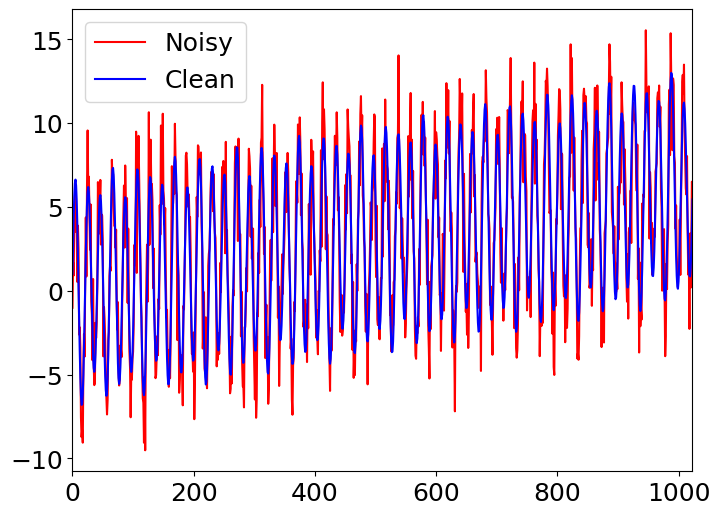

c:\Users\eporjus\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


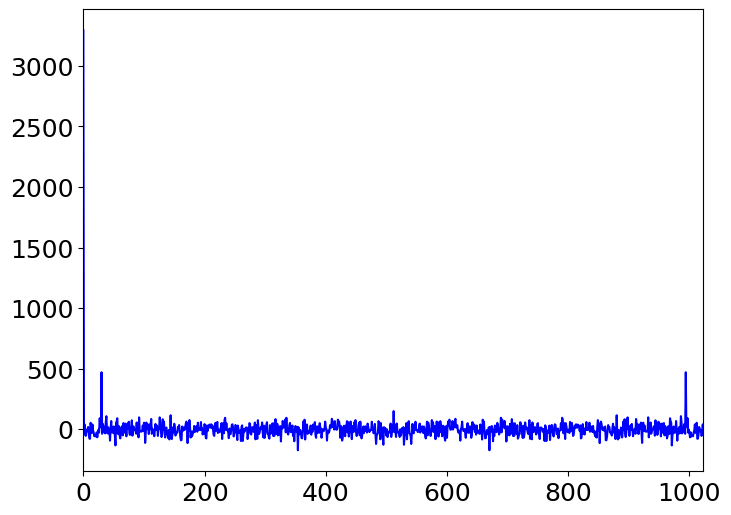

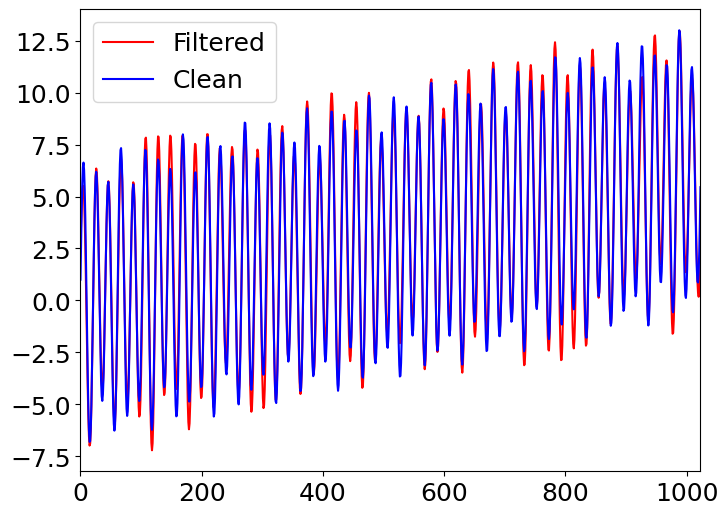

In [8]:
## ----------------------------------------------------------------------------------
## ZADANIE 6
## ----------------------------------------------------------------------------------

plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams.update({'font.size':18})

t = np.arange(0,N) 

s_clean = sample(N)
s_noise = s_clean + 2*np.random.randn(N)

plt.plot(t,s_noise,color='r',label='Noisy')
plt.plot(t,s_clean,color='b',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show() 

transformed = FastFourierTransform(s_noise)
plt.plot(t, transformed, color='b') 
plt.xlim(t[0],t[-1])
plt.show() 


for i in range(int(N/2)-450,int(N/2)+450):
    transformed[i] = 0

inv = InverseFastFourierTransform(transformed)

plt.plot(t,inv,color='r',label='Filtered')
plt.plot(t,s_clean,color='b',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show() 
